# Camera Tutorial

We will step through the simple functions that `face_rec` provides to allow you to use your camera via Python. Please be sure that you have installed OpenCV with the Python bindings (see repo README).

## Configuring Your Camera
Your camera configuration is comprised of:
  - your camera port (default=0)
  - the exposure time (default=0.1)
 
On devices with two cameras, you may need to set the port to 1 in order to access the keyboard-facing camera. This is the case on the Surface Pro, for instance. The exposure is the amount of time, in seconds, to wait before taking the picture. Increase the exposure time if your photo is too dark. A good value for exposure to try out is 0.2.

On other laptops, your port might be 0 (the default value). If you received a "NoneType" error while running the test_camera method, taking a photo, or accessing the camera, try setting the port value to 0.

You may notice that your camera is still active after you run through some of the cells that use the camera. To deactivate the camera, just restart the kernal.

Let's test a configuration:

Testing port: 0, exposure: 0.2(sec)


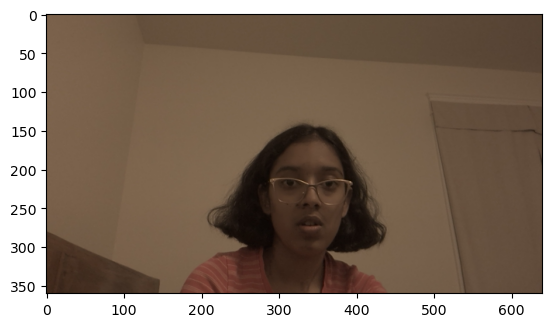

In [17]:
%matplotlib inline
from camera import test_camera

fig, ax, img = test_camera(port=0, exposure=0.2)

Looks like this is a good configuration! If I had left the port and exposure blank, it would have used my current configured value - or the default values if there is no config file.

Saving the configuration:

In [18]:
from camera import save_camera_config
save_camera_config(port=0, exposure=0.2)

Configuration saved: 
	port: 0, exposure 0.2 (sec)


The config file is saved to: face_rec/camera/config.ini:

```
[camera device]
port = 1
exposure = 0.2
```

## Taking a Picture
Taking a picture returns the numpy array of RGB values of the photo. This can be displayed by using matplotlib's `imshow`. `take_picture` will use your saved camera configuration (or the default config).

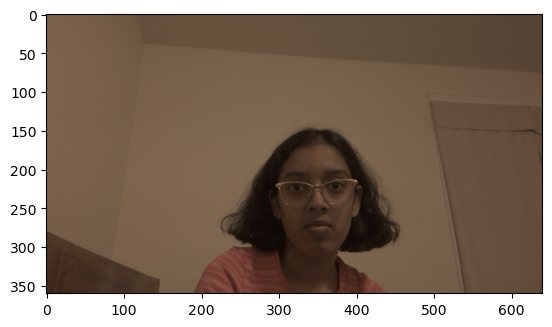

In [10]:
%matplotlib inline
from camera import take_picture
import matplotlib.pyplot as plt
img_array = take_picture()

fig,ax = plt.subplots()
ax.imshow(img_array)

## Accessing the Camera
If you want to access the camera in a more generic way, a context manager is supplied so that control over the camera is always relinquished by your code. You can manually set the port and exposure time, bypassing the config/default, if you'd like. Read the [docs on `cv2.VideoCapture`](http://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#videocapture-videocapture) for details into what can be done with the camera.

In [11]:
from camera import use_camera

# This will wait 0.5 seconds and then yield the active
# port-1 camera. Leaving the context releases the camera.
# You can read frames to take images or videos.
with use_camera(port=1, exposure=.5) as camera:
    pass
    # do stuff with camera
    # leaving this context releases camera